In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('data.csv')

In [19]:
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [23]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


In [31]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

In [33]:
print(df['Дата'].dtypes)

datetime64[ns]


In [35]:
sales_per_day = df.groupby('Дата').size().reset_index(name='Количество_продаж')
print(sales_per_day)

          Дата  Количество_продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


In [39]:
sales_per_day = df.groupby('Дата').size().reset_index(name='Количество_продаж')

In [41]:
print(sales_per_day.head())

        Дата  Количество_продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


In [43]:
print(df['Дата'].unique())

<DatetimeArray>
['2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-09 00:00:00', '2018-01-10 00:00:00',
 '2018-01-11 00:00:00', '2018-01-12 00:00:00', '2018-01-13 00:00:00',
 '2018-01-14 00:00:00',
 ...
 '2018-08-21 00:00:00', '2018-08-22 00:00:00', '2018-08-23 00:00:00',
 '2018-08-24 00:00:00', '2018-08-25 00:00:00', '2018-08-26 00:00:00',
 '2018-08-28 00:00:00', '2018-08-29 00:00:00', '2018-08-30 00:00:00',
 '2018-08-31 00:00:00']
Length: 205, dtype: datetime64[ns]


In [47]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')

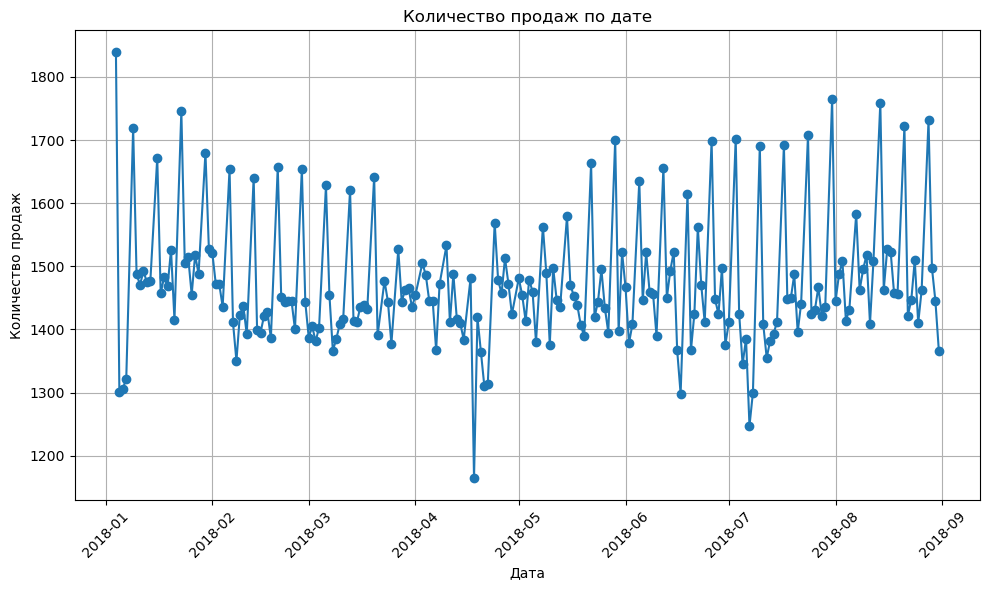

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], marker='o', linestyle='-')
plt.title('Количество продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### Название графика: "Количество продаж по дате"

Это линейный график с точками, отображающий количество продаж за каждый день.

*Ось X:* Дата (от начала января 2018 до сентября 2018)  
*Ось Y:* Количество продаж (от 1200 до 1800)

- Январь–март: колебания в пределах 1300–1700
- Апрель–июль: спад, затем рост
- Август–сентябрь: подъём, пик ~1800


In [67]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Нижняя и верхняя границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбираем выбросы (обычно рассматриваем только верхние выбросы по количеству продаж)
outliers = df[df['Количество'] > upper_bound]

# Если выбросы есть — выводим строку с максимальным количеством
if not outliers.empty:
    max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]
    print("Строка с максимальным выбросом по количеству продаж:")
    print(max_outlier_row)
else:
    print("Выбросов по количеству продаж не найдено.")

Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


In [99]:

df_warehouse3 = df[df['Склад'] == 3]

df_summer = df_warehouse3[df_warehouse3['Дата'].dt.month.isin([6, 7, 8])]


df_wednesdays = df_summer[df_summer['Дата'].dt.weekday == 2]


top_products = df_wednesdays.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = top_products.loc[top_products['Количество'].idxmax()]

print("Топовый товар по продажам по средам в июне, июле и августе на складе 3:")
print(top_product)

Топовый товар по продажам по средам в июне, июле и августе на складе 3:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


In [137]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
temperature_df = pd.read_csv("daily_avg_temperature_astana.csv")
sales_df = pd.read_csv("data.csv")

In [146]:

temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
sales_df['Дата'] = pd.to_datetime(sales_df['Дата'])


grouped_df = sales_df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df.rename(columns={'Количество': 'Количество продаж'}, inplace=True)


temperature_df.rename(columns={'Date': 'Дата'}, inplace=True)

In [148]:
merged_df = pd.merge(grouped_df, temperature_df, on='Дата', how='inner')

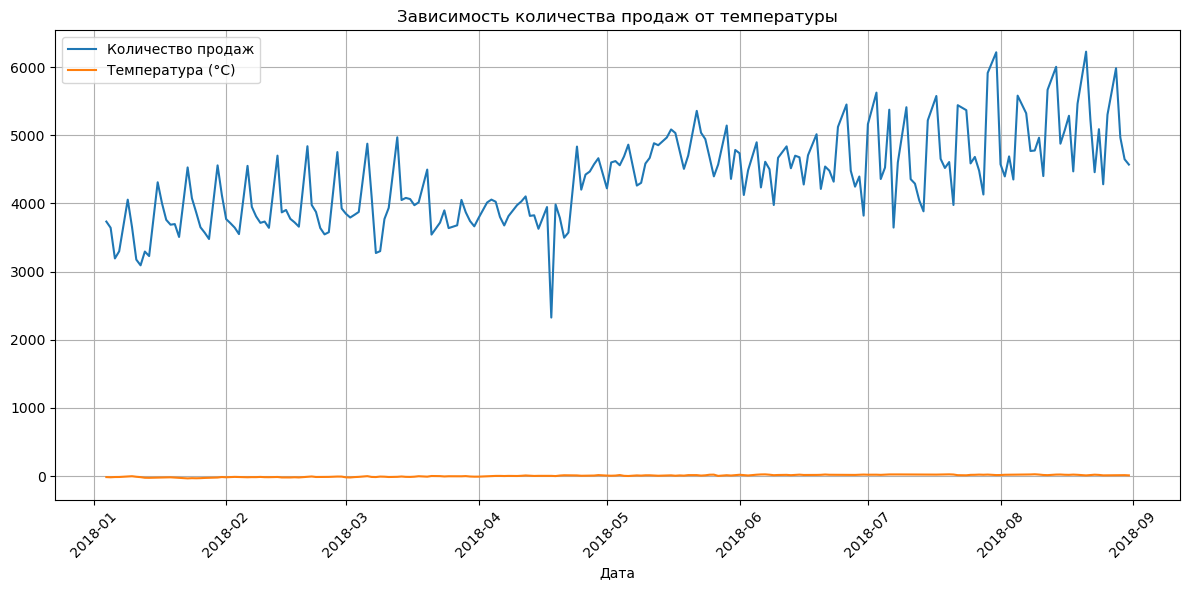

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (°C)')
plt.xlabel('Дата')
plt.title('Зависимость количества продаж от температуры')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

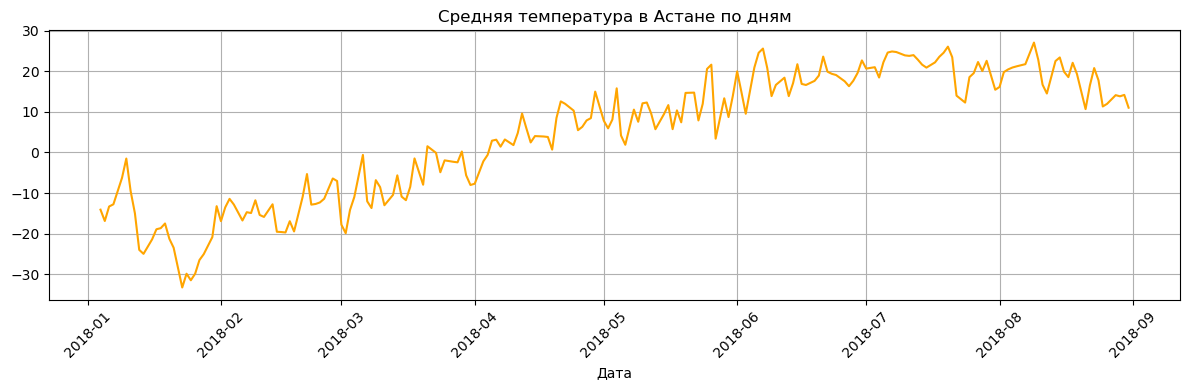

In [152]:
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Дата'], merged_df['T'], color='orange', label='Температура (°C)')
plt.xlabel('Дата')
plt.title('Средняя температура в Астане по дням')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()